# Stage 3: Python Fundamentals

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('..')
from src.utils import get_summary_stats

In [12]:
#vectorized vs normal operation
big_arr= np.arange(1_000_000)
%timeit [x * 3 for x in big_arr]
%timeit big_arr*3
#time almost the same as with example *2 but slightly slower for vectorized loop

45.3 ms ± 609 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
793 μs ± 4.31 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
#Dataframe analysis

df = pd.read_csv('../data/starter_data.csv')
df.info()
df.head()
if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')
#entire summary, but groupby aggregated by category
summary = df.groupby('category').mean(numeric_only=True).reset_index()
summary.to_csv('../data/processed/summary.csv', index=False)
#bonus summary function
print(get_summary_stats(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000


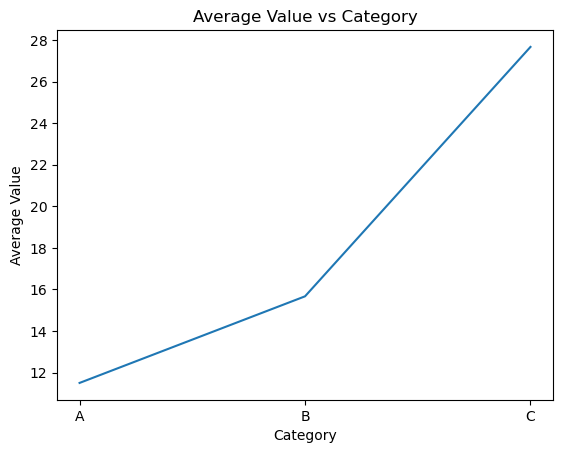

In [15]:
#bonus plot
df = pd.read_csv('../data/processed/summary.csv')
if not os.path.exists('../data/plots'):
    os.makedirs('../data/plots')
plt.plot(df['category'], df['value'])
plt.title('Average Value vs Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.savefig('../data/plots/average_value_vs_category.png')